# GeekBrains
# Введение в нейроные сети
## ДЗ Урока 2
## Виталий Казанцев

Используем набор примеров fasion-MNIST  
1 Опишите какой результат получен в нейро сети в зависимости от:  
 - Числа нейронов в слое (для 2-хслойной сети)   
 - Числа слоев(2, 3,5, 10) при близких размерах сети (близкле число тренируемых параметров)  
 - фиксируйте для тренировочного итестового набора метрики accuracy  
 
2 Проверьте работу разных оптимизаторов (SGD, Adam, RMSProp) для одной из моделей п.1  
  
3 Сделайте выод - что помогло вам улучшить качество классификации в нейросети на тестовом наборе?  
  
4 Для одного варианта сетей сформируйте матрицу ошибок по классам. Оцените качество модели по каждому классу отдельно(полнота, точность). Сделайте вывод.

In [1]:
import numpy as np
import keras
import matplotlib.pyplot as plt

from keras.datasets import fashion_mnist, mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

(train_imagesi, train_labels), (test_imagesi, test_labels) = fashion_mnist.load_data()

train_imagesi = (train_imagesi / 127) - 1
test_imagesi = (test_imagesi / 127) - 1

train_images = train_imagesi.reshape((-1, 784))
test_images = test_imagesi.reshape((-1, 784))

print(train_images.shape) # (60000, 28, 28)
print(test_images.shape) # (60000,)

2022-11-28 19:33:48.587010: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


(60000, 784)
(10000, 784)


In [2]:
n = 1
train_imagesi[n,:,:].shape

(28, 28)

In [3]:
keras.backend.backend()

'tensorflow'

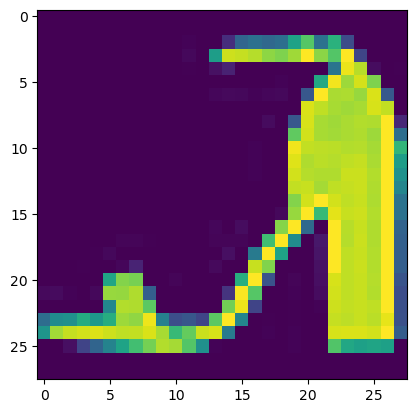

5


In [6]:
n = 2591
plt.imshow(train_imagesi[n, :, :])
plt.show()
print(train_labels[n])

In [7]:
train_labels[:12]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9], dtype=uint8)

In [10]:
model1 = Sequential(name='my_first_model')
model1.add(Dense(128, activation='relu', input_shape=(784,)))
for k in range(2):
    model1.add(Dense(10+(10-k)*10, activation='tanh'))
    
model1.add(Dense(10, activation='softmax'))

In [11]:
model1.compile(
    optimizer='adam',
    loss=keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)